# POL280 Bayesian Modelling Memo & Codes

(Contents are originally provided by Christopher Hare, annotated and revised by Gento Kato)

***THIS IS A MEMO, NOTE THAT THERE CAN BE ERRORS AND MISUNDERSTANDINGS***

## Topic 1: Introduction (04/13/2017) 

### Why Bayes (than Frequentist) ?

* Model **assumptions are clear**.
* Better way to make **probability statements** on quantitities of interest.
* Can **update** statements as new information is received.

### Bayes Theorem (Bayes Rule)

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

*Example: Test of Disease* 

* 1% of the population has the disease: $P(A) = 0.01$
* A test is 95% accurate to detect the disease: $P(B|A) = 0.95$
* Probability that you have the disease when you've tested positive: $P(A|B)$?

\begin{align}
P(A|B) = \frac{P(B|A) P(A)}{P(B)} &= \frac{P(B|A) P(A)}{P(A)P(B|A)+P(!A)P(B|!A)}\\
&= \frac{.95 \times .01}{(.01 \times .95) + (.99 \times .05)} \\
&\approx 0.16
\end{align}

### Intuition: The Monty Hall Problem

Suppose you're on a game show and you're given teh choice of three doors: Behind one door is a car; behind the otheres, goats. You pick a door, say No.1, and the host, who knows what's behind the doors, opens another door, say No.3, which has a goat. He then says to you "Do you wan to pick door No.2?" Is it to your advantage to switch your choice?

Let's pick door 1, and Monty then opens door 2 to show us a goat.

Let A represent the outcome that the car is behind door 1. Let B represent the event that we're shown a goat behind door 2:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Let's Simulate by R!

In [6]:
## Monty Hall Problem Simulation ##
doors <- c("1", "2", "3") # Three Doors 
sim_montyhall <- function(door){
car <- sample(doors, 1) # define the door with car
pick <- doors[door] # your pick of the door
open <- sample(doors[which(doors!=car & doors!=pick)], 1) # define the door opened
return(pick==car) # return if the car is behind your picked door.
}
sims <- replicate(10000, sim_montyhall(1) ) #repeat the process many times
mean(sims) # The probability

[1] 0.3304

###  Monte Carlo Simulation

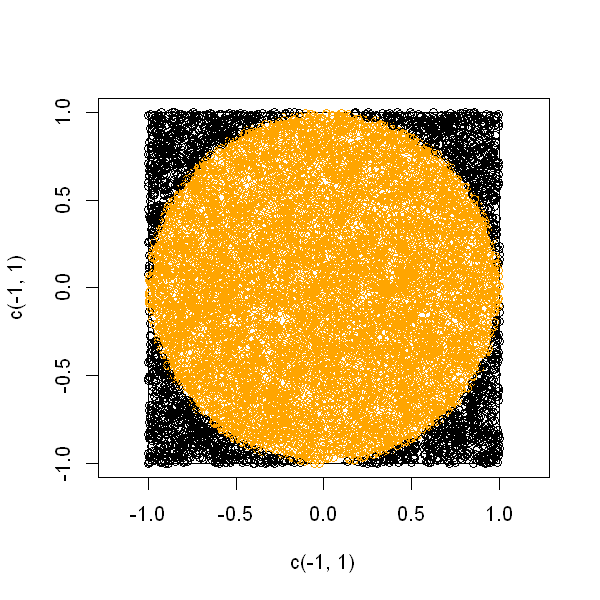

In [2]:
## Monte Carlo Simulation ##

#install.packages("plotrix")
library(plotrix)
library(grid)

options(repr.plot.width=5, repr.plot.height=5)
## Plot Rectangle and Circle
plot(c(-1, 1), c(-1, 1), type = "n", asp = 1)
rect(-1, -1, 1, 1)
draw.circle(0, 0, 1)

## Conduct Simulation 
nsamp <- 10000 # The size of sample
inside <- NA # Storage for those values inside the circle
for(i in 1:nsamp){
  x <- runif(2, -1, 1) ## Draw two values from uniform distribution (-1, 1)
  if (sqrt(x[1] * x[1] + x[2] * x[2]) < 1) {
    inside[i] <- 1; points(x[1], x[2], col = "orange")
  }
  if (sqrt(x[1] * x[1] + x[2] * x[2]) > 1) {
    inside[i] <- 0; points(x[1], x[2], col = "black")
  }
}

In [5]:
table(inside)
4 * (7848 / 10000)

inside
   0    1 
2176 7824 

[1] 3.1392